In [1]:
# CNN INTRO 16/03/2025

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D,Flatten,MaxPool2D,Dropout
from keras.utils import to_categorical
plt.style.use('fivethirtyeight')  #style with bold font,thick lines,grid lines,zoomed/bigger plot size, Light grey background
print("yes")


yes


In [6]:
# import numpy
# import scipy
# import tensorflow
# import keras

print("NumPy Version:", numpy.__version__)
print("SciPy Version:", scipy.__version__)
print("TensorFlow Version:", tensorflow.__version__)
print("Keras Version:", keras.__version__)


NameError: name 'numpy' is not defined

In [7]:
from keras.datasets import cifar10

In [8]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [9]:
print(type(x_train))
print("X_Train LENGTH : ",len(x_train),
     "\nY_Train LENGTH : ",len(y_train),
     "\nX_Test LENGTH  : ",len(x_test),
     "\nY_Test LENGTH  : ",len(y_test))

<class 'numpy.ndarray'>
X_Train LENGTH :  50000 
Y_Train LENGTH :  50000 
X_Test LENGTH  :  10000 
Y_Test LENGTH  :  10000


In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
x_train # 0-255 RGB pixels

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

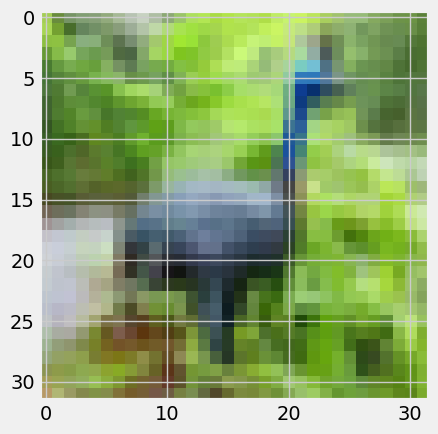

In [12]:
img0=plt.imshow(x_train[6])

In [13]:
#to get img label
cifar10_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                  "Dog", "Frog", "Horse", "Ship", "Truck"]
label1=y_train[6]
print(type(label1))
print("IMAGE = ",cifar10_labels[int(label1)])

<class 'numpy.ndarray'>
IMAGE =  Bird


C:\Users\subu\AppData\Local\Temp\ipykernel_37948\1162129021.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("IMAGE = ",cifar10_labels[int(label1)])


In [14]:
# One-hot encoding converts categorical labels into binary vectors where only one position is "1" and the rest are "0". This prevents models from 
# misinterpreting categorical values as having numerical order and ensures equal weight for all classes. In TensorFlow/Keras, to_categorical() is used to apply one-hot encoding for model training.



y_train_onehot=to_categorical(y_train)
y_test_onehot=to_categorical(y_test)
print("y_train 6 = ",y_train[6],"\ny_train to onehot 6 =",y_train_onehot[6],"\ny_test 6= ",y_test[6],"\ny_test_onehot 6= ",y_test_onehot[6])

y_train 6 =  [2] 
y_train to onehot 6 = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
y_test 6=  [1] 
y_test_onehot 6=  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
# normalizing 0-255 ---> 0-1
x_train=x_train/255
x_train=x_test/255


In [16]:
#Sequential() is like building a tower with blocks, where each block (layer) is placed one after another.
#It helps create a simple model step by step for a computer to learn things. 😊
# Neural network creation
model=Sequential()



# 1) First convulutional layer creation
model.add(Conv2D(32,(5,5),activation="relu",input_shape=(32,32,3)))
'''
Breakdown:
Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)) 32x32 Megapixel 3 colour RGB 
Conv2D: This layer applies 32 filters (small sliding windows) to the input image.
32: The number of filters (feature detectors) in this layer.
(5,5): The size of each filter (5x5 pixels).
activation="relu": Uses ReLU (Rectified Linear Unit) activation, which helps introduce non-linearity.
input_shape=(32,32,3): Specifies the shape of input images:
32x32 pixels (height × width).
3 channels (RGB image).
'''

C:\Users\subu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


'\nBreakdown:\nConv2D(32, (5,5), activation="relu", input_shape=(32,32,3)) 32x32 Megapixel 3 colour RGB \nConv2D: This layer applies 32 filters (small sliding windows) to the input image.\n32: The number of filters (feature detectors) in this layer.\n(5,5): The size of each filter (5x5 pixels).\nactivation="relu": Uses ReLU (Rectified Linear Unit) activation, which helps introduce non-linearity.\ninput_shape=(32,32,3): Specifies the shape of input images:\n32x32 pixels (height × width).\n3 channels (RGB image).\n'

In [17]:
''' 2) Pooling layer'''
model.add(MaxPool2D(2,2))

# In MaxPooling, a filter (window) slides over the input, and for each region, it selects the maximum value. or imp info out of provided
# Key Points:
# (2×2) pooling is most commonly used as it balances detail retention and size reduction.
# (3×3) pooling reduces the feature map more aggressively, leading to more compression but possible information loss.
# Larger pool sizes (e.g., 4×4) shrink the feature map even more but may discard too many details.

In [18]:
'''3) again convutionnal layer'''
model.add(Conv2D(32,(5,5),activation="relu"))
#4) again Maxpool
model.add(MaxPool2D(2,2))

In [19]:
''' Flatten Model'''
# In CNNs, Flatten() converts multi-dimensional feature maps into a 1D vector before passing them to fully connected (Dense) layers.
# Since CNN extracts features as multi-dimensional tensors (e.g., 4×4×64), Flatten() reshapes them into a single vector.This adopts Dense layers for classification.
model.add(Flatten())

In [20]:
'''dense to create 1000 neurons'''
# A Dense layer is like a smart decision-maker in a deep learning model.
# It takes all information from the previous layer.It learns patterns and makes sense of the data. It helps to final answer, like recognizing cat or dog in image.
# Example:If CNN finds eyes, nose, and fur, the Dense layer puts it all together and says, "This is a cat!" 🐱

model.add(Dense(1000,activation="relu"))

In [20]:
''' Add Dropout Layer'''
# Dropout randomly deactivates some neurons during training (Dropout(0.5) turns off 50%) to prevent overfitting.During testing, all neurons are active for full model capacity.
model.add(Dropout(0.5))

In [21]:
# Add a Layer
model.add(Dense(500, activation='relu'))

# Add Dropout Layer
model.add(Dropout(0.5))

# Add a Layer
model.add(Dense(250, activation='relu'))  # Fixed syntax

# The first layer has 1000 neurons that help the model learn patterns from data.
# Dropout(0.5) randomly turns off half of the neurons to prevent the model from depending too much on specific ones.
# The next layer has 500 neurons, refining what was learned earlier.
# Dropout(0.5) again turns off half of the neurons to make learning more general.
# The final layer has 250 neurons, further simplifying and improving the model’s learning.

In [22]:
'''Finally in ciar 10 we have 10 category so final 10 in final dense layer we use softmax'''
model.add(Dense(10,activation="softmax"))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │         801,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457,324 (5.56 MB)

 Trainable params: 1,457,324 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
tr=model.fit(x_train, y_train_onehot, batch_size=256, epochs=600, validation_split=0.2)


Epoch 1/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.0991 - loss: 2.3076 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 2/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.1092 - loss: 2.3019 - val_accuracy: 0.1055 - val_loss: 2.3026
Epoch 3/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0971 - loss: 2.3026 - val_accuracy: 0.0985 - val_loss: 2.3029
Epoch 4/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.1116 - loss: 2.3015 - val_accuracy: 0.1040 - val_loss: 2.3029
Epoch 5/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.1046 - loss: 2.3026 - val_accuracy: 0.1030 - val_loss: 2.3032
Epoch 6/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.1091 - loss: 2.3009 - val_accuracy: 0.0975 - val_loss: 2.3052
Epoch 7/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.1128 - loss: 2.3001 - val_accuracy: 0.0995 - val_loss: 2.3027
Epoch 8/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.1030 - loss: 2.3017 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


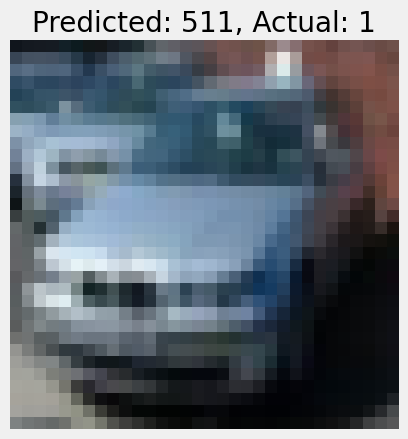

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


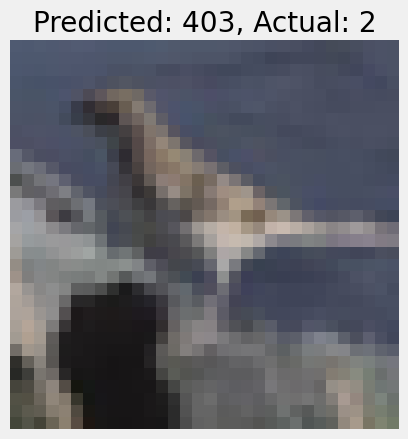

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


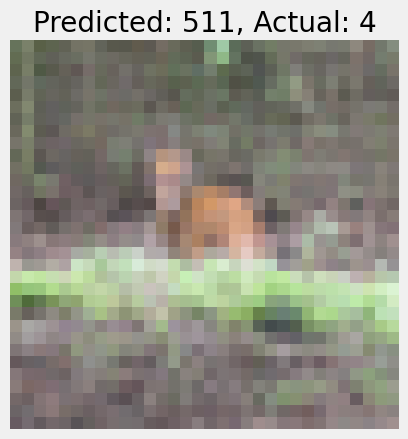

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


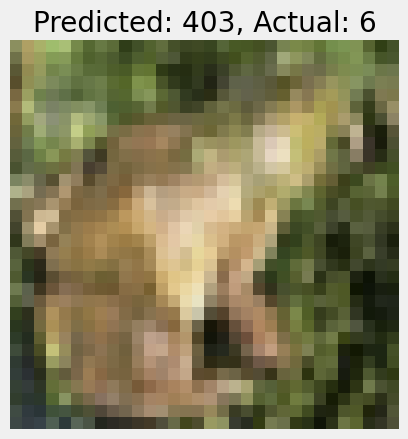

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


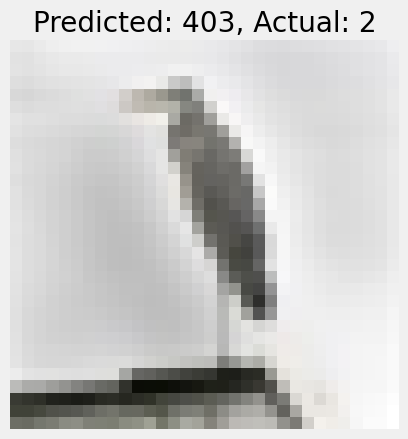

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


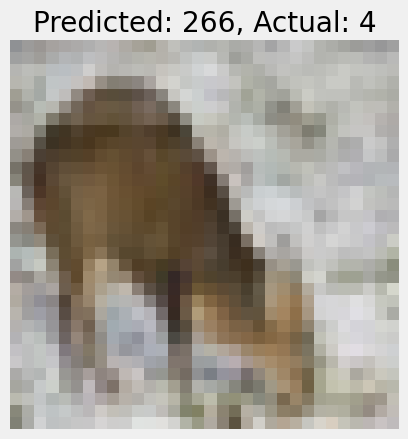

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


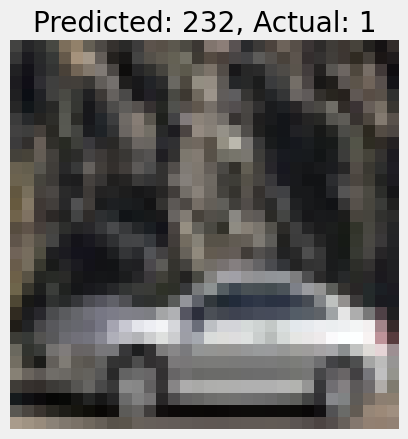

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


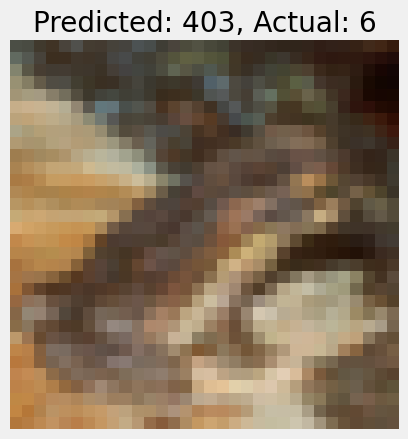

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


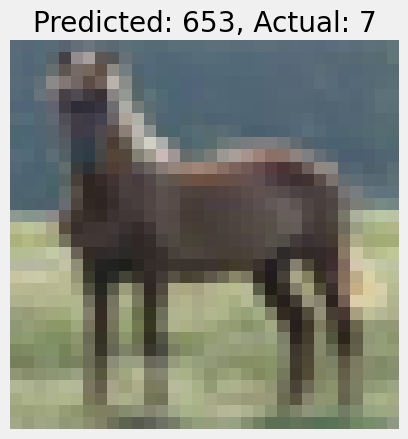

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


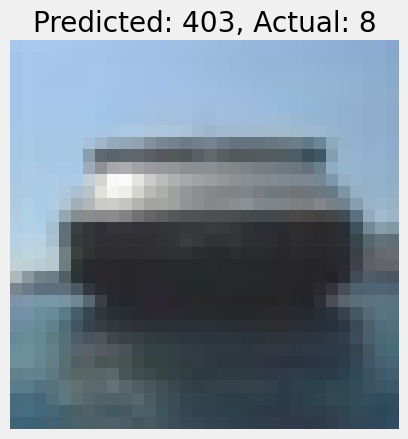

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Sucess Rate =  0.0


In [22]:
t,n=0,0
while n<10:
    i = np.random.randint(len(x_test))  
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {np.argmax(model.predict(x_test[i:i+1]))}, Actual: {np.argmax(y_test_onehot[i])}")  
    plt.axis('off')  
    plt.show()
    if (np.argmax(model.predict(x_test[i:i+1]))==np.argmax(y_test_onehot[i])):
        t+=1
    n+=1
print("Sucess Rate = ",(t/10)*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


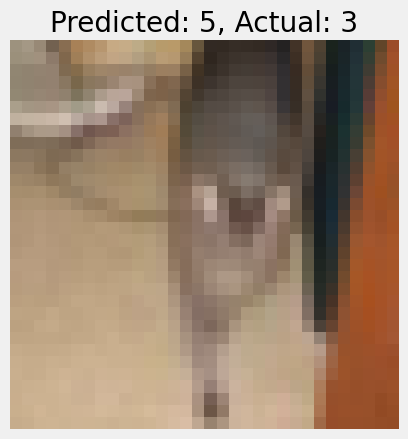

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


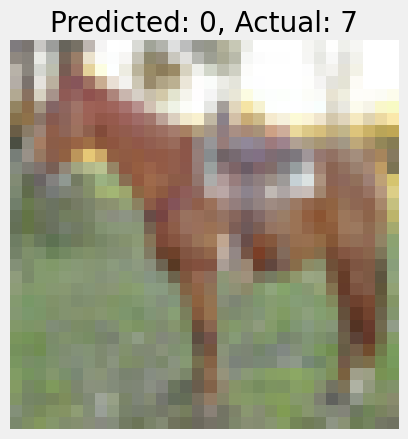

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


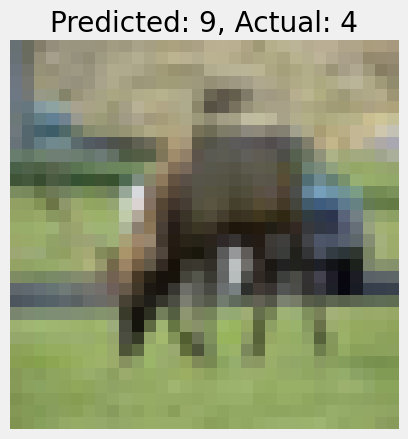

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


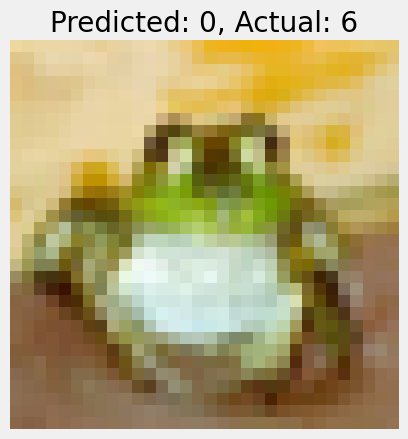

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


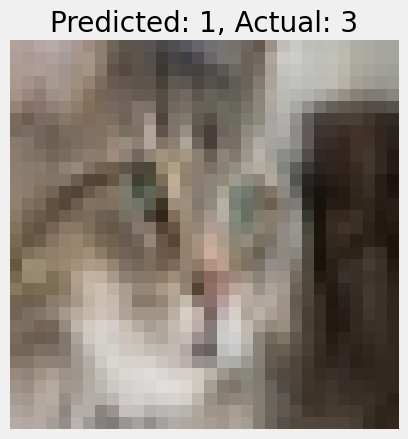

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


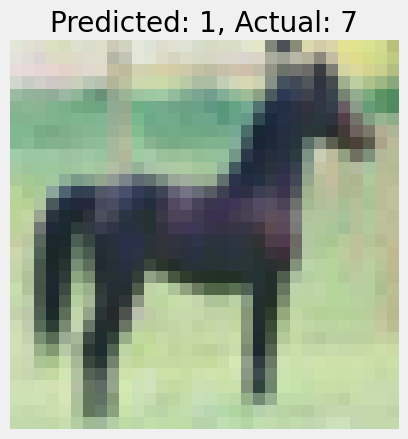

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


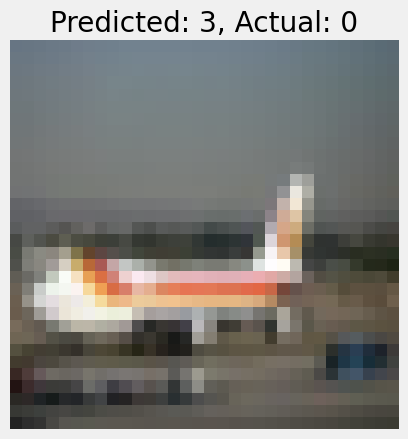

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


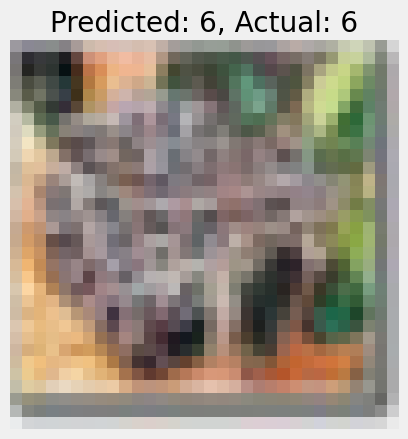

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [49]:
while True:
    i = np.random.randint(len(x_test))  
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {np.argmax(model.predict(x_test[i:i+1]))}, Actual: {np.argmax(y_test_onehot[i])}")  
    plt.axis('off')  
    plt.show()
    if (np.argmax(model.predict(x_test[i:i+1]))==np.argmax(y_test_onehot[i])):
        break

        